In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

**4. Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation be-
tween the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a
radial kernel will outperform a support vector classifier on the train-
ing data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up
your assertions.**

In [2]:
np.random.seed(1)
X = np.random.normal(0,1,(100,2))
y = np.repeat([-1,1], 50)
z1 = (X[:50,0] > 0)
z2 = (X[:50,0] < 0)
X[:50,1][z1] = X[:50,1][z1] - 2.5
X[:50,1][z2] = X[:50,1][z2] + 2.5
z1 = (X[50:,0] > 0)
z2 = (X[50:,0] < 0)
X[50:,1][z1] = X[50:,1][z1] + 2.5
X[50:,1][z2] = X[50:,1][z2] - 2.5

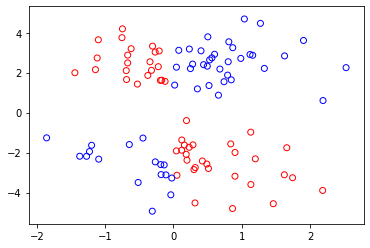

In [3]:
from matplotlib.colors import ListedColormap
color_list =  ['red','blue','green','black','yellow','brown','peru']
cmap = ListedColormap(color_list[:2])
for idx, cls in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cls, 0], y=X[y == cls, 1], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test = train_test_split(X, test_size=0.5, random_state=1)
y_train, y_test = train_test_split(y, test_size=0.5, random_state=1)
svc = SVC(kernel="linear", C = 10)
svc.fit(X_train,y_train)
svm_poly = SVC(kernel="poly", C = 10)
svm_poly.fit(X_train,y_train)
svm_rbf = SVC(kernel="rbf", C = 10)
svm_rbf.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
from sklearn.metrics import accuracy_score
method_list = ['svc_train','svc_test','svm_poly_train','svm_poly_test','svm_rbf_train','svm_rbf_test']
error_rates_list = []
y_pred = svc.predict(X_train)
error_rates_list.append(1 - accuracy_score(y_train, y_pred))
y_pred = svc.predict(X_test)
error_rates_list.append(1 - accuracy_score(y_test, y_pred))
y_pred = svm_poly.predict(X_train)
error_rates_list.append(1 - accuracy_score(y_train, y_pred))
y_pred = svm_poly.predict(X_test)
error_rates_list.append(1 - accuracy_score(y_test, y_pred))
y_pred = svm_rbf.predict(X_train)
error_rates_list.append(1 - accuracy_score(y_train, y_pred))
y_pred = svm_rbf.predict(X_test)
error_rates_list.append(1 - accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Error Rates')

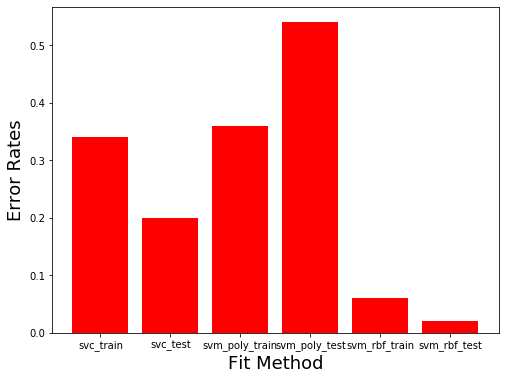

In [6]:
plt.figure(figsize=(8, 6))
plt.bar(method_list,error_rates_list,color = 'red')
plt.xlabel("Fit Method", fontsize=18)
plt.ylabel("Error Rates", fontsize=18)

In [7]:
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
def plot_svc(svc, X, y, h=0.02, pad=0.25,figsize = (8,6)):
    color_list = ['red','blue','green','black','yellow','brown','peru']
    cmap = ListedColormap(color_list[:len(np.unique(y))])
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    levels = MaxNLocator(nbins=len(svc.classes_)).tick_values(Z.min(), Z.max())
    plt.figure(figsize = figsize)
    cs = plt.contourf(xx, yy, Z,alpha=0.25, cmap=cmap,levels = levels)
    cb = plt.colorbar(cs)
    cb.set_ticks(svc.classes_)
    #plt.scatter(X[:,0], X[:,1], s=120, edgecolors = element_to_color(y), marker = 'o',color = '')
    for idx, cls in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cls, 0], y=X[y == cls, 1], s=120,
                    marker = 'o',color = '',edgecolors = cmap(idx))
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c = 'k', marker='x', s=50, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('$X_1$')
    plt.ylabel('$X_1$')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

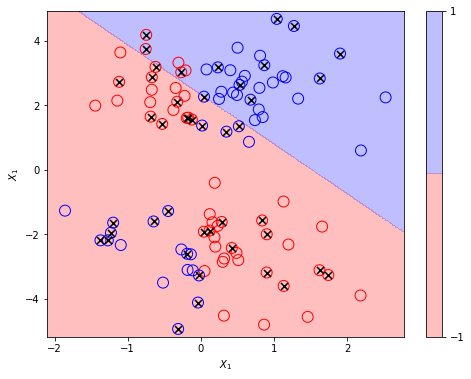

Number of support vectors:  44


In [8]:
plot_svc(svc, X, y)

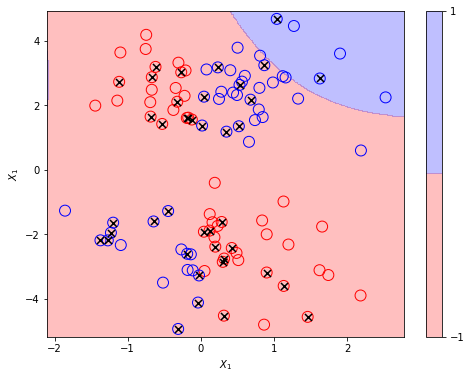

Number of support vectors:  41


In [9]:
plot_svc(svm_poly, X, y)

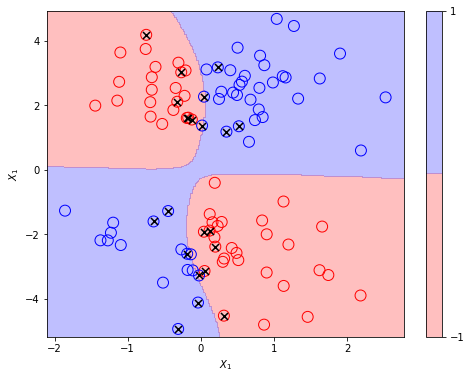

Number of support vectors:  22


In [10]:
plot_svc(svm_rbf, X, y)

**换一个数据组重新做一遍**

In [11]:
np.random.seed(1)
X = np.random.normal(0,1,(100,2))
y = np.repeat([-1,1], 50)
X[:50,1] = X[:50,1] + ( 9 - X[:50,0] ** 2)
X[50:,1] = X[50:,1] + (5 - X[50:,0] ** 2)

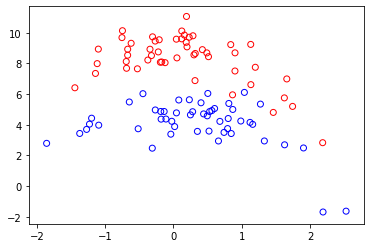

In [12]:
for idx, cls in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cls, 0], y=X[y == cls, 1], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

Text(0, 0.5, 'Error Rates')

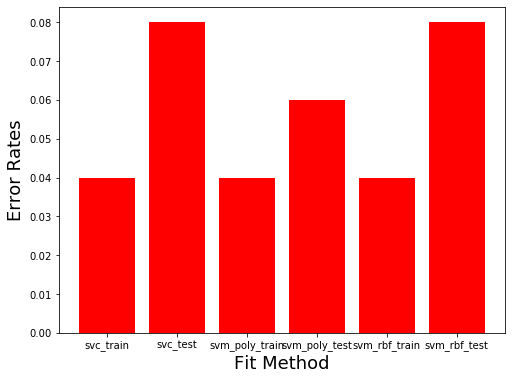

In [13]:
X_train, X_test = train_test_split(X, test_size=0.5, random_state=1)
y_train, y_test = train_test_split(y, test_size=0.5, random_state=1)
svc = SVC(kernel="linear", C = 10)
svc.fit(X_train,y_train)
svm_poly = SVC(kernel="poly", C = 10)
svm_poly.fit(X_train,y_train)
svm_rbf = SVC(kernel="rbf", C = 10)
svm_rbf.fit(X_train,y_train)
method_list = ['svc_train','svc_test','svm_poly_train','svm_poly_test','svm_rbf_train','svm_rbf_test']
error_rates_list = []

y_pred = svc.predict(X_train)
error_rates_list.append(1 - accuracy_score(y_train, y_pred))
y_pred = svc.predict(X_test)
error_rates_list.append(1 - accuracy_score(y_test, y_pred))
y_pred = svm_poly.predict(X_train)
error_rates_list.append(1 - accuracy_score(y_train, y_pred))
y_pred = svm_poly.predict(X_test)
error_rates_list.append(1 - accuracy_score(y_test, y_pred))
y_pred = svm_rbf.predict(X_train)
error_rates_list.append(1 - accuracy_score(y_train, y_pred))
y_pred = svm_rbf.predict(X_test)
error_rates_list.append(1 - accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.bar(method_list,error_rates_list,color = 'red')
plt.xlabel("Fit Method", fontsize=18)
plt.ylabel("Error Rates", fontsize=18)

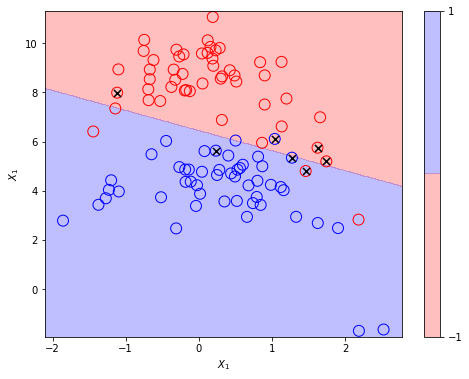

Number of support vectors:  7


In [14]:
plot_svc(svc, X, y)

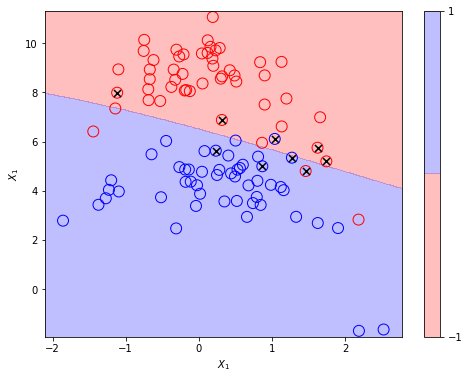

Number of support vectors:  9


In [15]:
plot_svc(svm_poly, X, y)

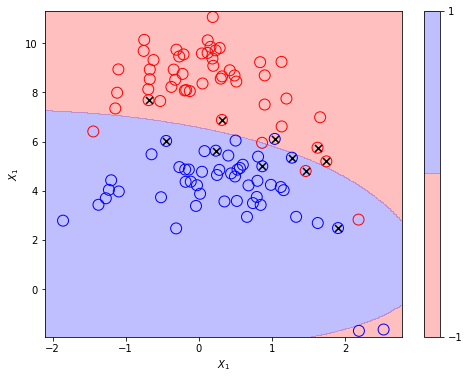

Number of support vectors:  11


In [16]:
plot_svc(svm_rbf, X, y)

**从两个例子来看在训练集上多项式和径向核均好于支持向量分类器，但从测试集来看，受实际数据区分方式影响较大**